In [1]:
!pip install deap

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
     ------------------- -------------------- 0.5/1.1 MB 1.0 MB/s eta 0:00:01
     ------------------- -------------------- 0.5/1.1 MB 1.0 MB/s eta 0:00:01
     ----------------------------- ---------- 0.8/1.1 MB 838.9 kB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 994.6 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.6 MB ? eta -

In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 598.5 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/8.0 MB 670.4 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.0 MB 670.4 kB/s eta 0:00:11
   ----- ---------------------------------- 1.0/8.0 MB 689.2 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.0 MB 753.8 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.0 MB 753.8 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.0 MB 783.9 kB/s eta 0:00:09
   --------- ------------------

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [5]:
# Define the number of locations and vehicles
num_locations = 9
locations = [(20, 30), (31, 89), (3, 6), (26, 12), (16, 7), (81, 2), (10, 13), (71, 100), (84, 26)]

In [6]:
# Randomly generate depot locations (one for all vehicles)
depot = [(random.randint(0, 100), random.randint(0, 100))]

In [7]:

num_vehicles = 4

# Define fitness and individual using DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Initialize toolbox
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
# Define the fitness evaluation function
def evalVRP(individual):
    routes = []
    locations_per_vehicle = len(individual) // num_vehicles
    for i in range(num_vehicles):
        start = i * locations_per_vehicle
        end = (i + 1) * locations_per_vehicle
        if i == num_vehicles - 1:
            routes.append(individual[start:])  # Last vehicle takes remaining locations
        else:
            routes.append(individual[start:end])

    # Calculate total distance for all routes
    total_distance = 0
    for route in routes:
        current_distance = 0
        current_location = depot[0]
        for location_index in route:
            next_location = locations[location_index]
            current_distance += np.sqrt((next_location[0] - current_location[0]) ** 2 +
                                        (next_location[1] - current_location[1]) ** 2)
            current_location = next_location
        # Add distance back to depot
        current_distance += np.sqrt((depot[0][0] - current_location[0]) ** 2 +
                                     (depot[0][1] - current_location[1]) ** 2)
        total_distance += current_distance
    return total_distance,

In [9]:
# Register genetic algorithm operators
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalVRP)

In [10]:
# Function to visualize routes
def plot_routes(individual, title="Routes"):
    routes = []
    locations_per_vehicle = len(individual) // num_vehicles
    for i in range(num_vehicles):
        start = i * locations_per_vehicle
        end = (i + 1) * locations_per_vehicle
        if i == num_vehicles - 1:
            routes.append(individual[start:])
        else:
            routes.append(individual[start:end])

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.scatter(*zip(*locations), color='blue', label='Locations', s=50)  # Plot locations
    plt.scatter(*zip(*depot), color='red', label='Depot', marker='*', s=100)  # Plot depot

    colors = ['r', 'g', 'm', 'c', 'y']  # Colors for the routes

    for i, route in enumerate(routes):
        current_location = depot[0]
        for location_index in route:
            next_location = locations[location_index]
            plt.plot([current_location[0], next_location[0]],
                     [current_location[1], next_location[1]],
                     color=colors[i % len(colors)], linestyle='-', marker='o', markersize=3)
            current_location = next_location
        # Plot line from the last location back to depot
        plt.plot([current_location[0], depot[0][0]],
                 [current_location[1], depot[0][1]],
                 color=colors[i % len(colors)], linestyle='-', marker='o', markersize=3)

    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()


gen	nevals	min    	avg    
0  	50    	483.484	639.472
1  	35    	475.92 	611.179
2  	41    	475.92 	597.192
3  	38    	475.92 	596.559
4  	41    	475.92 	583.281
5  	42    	475.92 	562.39 
6  	44    	475.456	550.097
7  	32    	475.456	528.303
8  	42    	475.456	509.43 
9  	38    	475.456	506.106
10 	37    	475.456	501.532
11 	41    	475.456	487.375
12 	38    	475.456	503.58 
13 	38    	475.456	490.282
14 	35    	475.456	502.954
15 	44    	475.456	505.135
16 	42    	475.456	487.439
17 	39    	475.456	496.324
18 	43    	475.456	492.965
19 	38    	475.456	492.725
20 	42    	475.456	500.941
21 	36    	475.456	491.484
22 	36    	475.456	491.72 
23 	41    	475.456	496.442
24 	33    	475.456	490.339
25 	38    	475.456	509.949
26 	36    	475.456	503.081
27 	34    	475.456	492.179
28 	41    	475.456	496.812
29 	37    	475.456	495.991
30 	41    	475.456	495.724
31 	39    	475.456	494.257
32 	33    	475.456	487.873
33 	35    	475.456	495.819
34 	33    	468.598	496.883
35 	31    	475.456	509.42 
3

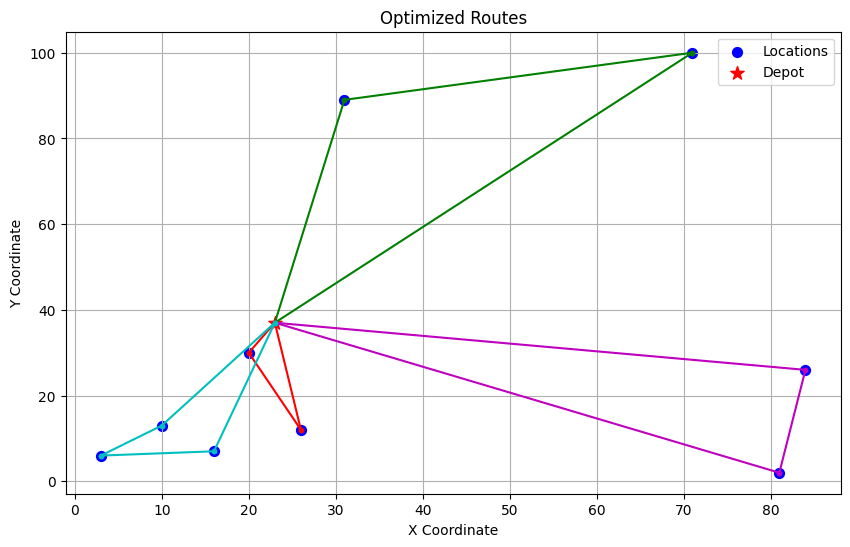

In [11]:
# Run the genetic algorithm
def main():
    pop = toolbox.population(n=50)  # Initialize population
    hof = tools.HallOfFame(1)  # Keep track of the best individual
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

    # Plot the best routes
    best_individual = hof[0]
    print("Best individual:", best_individual)
    print("Best fitness:", evalVRP(best_individual))
    plot_routes(best_individual, title="Optimized Routes")

if __name__ == "__main__":
    main()